<a href="https://colab.research.google.com/github/ShahdFekrry/Graduation-Project-Approach1/blob/main/Final_Recurrence_Approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datasets
**Training dataset:**

1.   Metabric Breast Cancer dataset
2.   Duke university Breast Cancer dataset
3.   MSK Breast Cancer dataset



**Validation dataset:** Real patients from Baheya hospital



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn import preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/merged_data2.csv')

In [ ]:
Baheya_data = pd.read_csv('/content/merged_baheya.csv')

## **Shuffle**

In [ ]:
import pandas as pd
import random

def shuffle_csv_file(file_path):
    # Load the CSV file into a DataFrame
    df = pd.read_csv(file_path)

    # Shuffle the DataFrame
    df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

    # Save the shuffled DataFrame back to the CSV file
    df_shuffled.to_csv(file_path, index=False)


csv_file_path = '/content/merged_data2.csv'
shuffle_csv_file(csv_file_path)


In [ ]:
data = pd.read_csv('/content/merged_data2.csv')

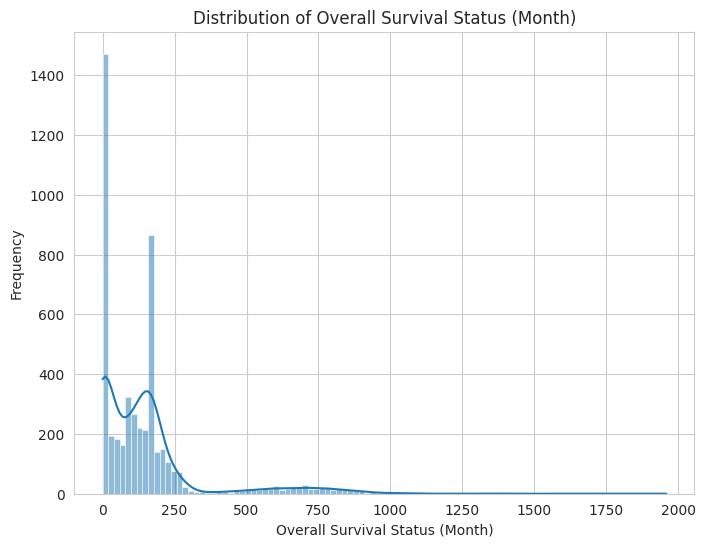

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set_style("whitegrid")

# Create a histogram of the 'Overall Survival Status (Month)' column
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Overall Survival Status (Month)', kde=True)
plt.title('Distribution of Overall Survival Status (Month)')
plt.xlabel('Overall Survival Status (Month)')
plt.ylabel('Frequency')
plt.show()


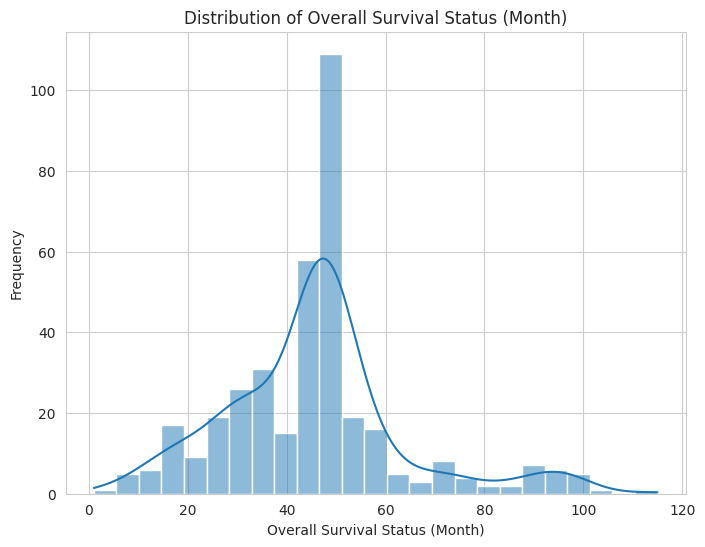

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set_style("whitegrid")

# Create a histogram of the 'Overall Survival Status (Month)' column
plt.figure(figsize=(8, 6))
sns.histplot(data=Baheya_data, x='Overall Survival Status (Month)', kde=True)
plt.title('Distribution of Overall Survival Status (Month)')
plt.xlabel('Overall Survival Status (Month)')
plt.ylabel('Frequency')
plt.show()


# Train

### Preprocessing

**1. Split dataset into features and target**






In [ ]:
X = data.drop('Recurrence Free Status',axis=1)
y = data['Recurrence Free Status']

**2. Perform one-hot encoding**




In [ ]:
X = pd.get_dummies(X, columns=['Menopausal Status','Tumor Size','Lymph Node Status',
                               'Tumor Grade', 'Histological Type','ER', 'PR',
                               'HER2','Tumor Location','Overall Survival Status'])

**3. Encode labels in target column**


In [ ]:
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(y)

**4. Train Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

**5. Min Max Scaler**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train[['Overall Survival Status (Month)', 'Recurrence Free Status (Month)']])
X_train_scaled = scaler.transform(X_train[['Overall Survival Status (Month)', 'Recurrence Free Status (Month)']])
X_test_scaled = scaler.transform(X_test[['Overall Survival Status (Month)', 'Recurrence Free Status (Month)']])

### Models

**1. Random Forest Model**

In [ ]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import time

start_time = time.time()

clf = RandomForestClassifier(n_estimators=10000, random_state=42, n_jobs=1)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_train_scaled)

y_pred_original = label_encoder.inverse_transform(y_pred)
y_train_original = label_encoder.inverse_transform(y_train)

end_time = time.time()

# Calculate the execution time
execution_time = end_time - start_time
print(f"Model training took {execution_time:.2f} seconds")

Model training took 47.64 seconds


In [ ]:
cv_scores = cross_val_score(clf, X_train_scaled, y_train_original, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.91982507 0.91399417 0.90524781 0.89795918 0.90962099]
Mean Accuracy: 0.9093294460641399


In [ ]:
train_accuracy = accuracy_score(y_train_original, y_pred_original)
train_report = classification_report(y_train_original, y_pred_original)

print("Training Set Accuracy:", train_accuracy)
print("Training Set Classification Report:\n", train_report)

Training Set Accuracy: 0.9787172011661808
Training Set Classification Report:
               precision    recall  f1-score   support

Not Recurred       0.97      0.99      0.98      1792
    Recurred       0.99      0.97      0.98      1638

    accuracy                           0.98      3430
   macro avg       0.98      0.98      0.98      3430
weighted avg       0.98      0.98      0.98      3430



In [ ]:
import joblib
from sklearn.ensemble import RandomForestClassifier

joblib.dump(clf, "/content/drive/MyDrive/Models/RF_model.joblib")

['/content/drive/MyDrive/Models/RF_model.joblib']



---



**2. XGBoost Model**

In [ ]:
pip install xgboost

In [ ]:
from sklearn.model_selection import cross_val_score
import xgboost as xgb
import time

start_time = time.time()

xgb = xgb.XGBClassifier(n_estimators=300, max_depth=5, learning_rate=0.1)
xgb.fit(X_train_scaled, y_train)

y_pred = xgb.predict(X_train_scaled)

end_time = time.time()

# Calculate the execution time
execution_time = end_time - start_time
print(f"Model training took {execution_time:.2f} seconds")

Model training took 2.35 seconds


In [ ]:
cv_scores = cross_val_score(xgb, X_train_scaled, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.93440233 0.93002915 0.92419825 0.90233236 0.92274052]
Mean Accuracy: 0.9227405247813412


In [ ]:
train_accuracy = accuracy_score(y_train, y_pred)
train_report = classification_report(y_train, y_pred)

print("Training Set Accuracy:", train_accuracy)
print("Training Set Classification Report:\n", train_report)

Training Set Accuracy: 0.9469387755102041
Training Set Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      1792
           1       0.97      0.92      0.94      1638

    accuracy                           0.95      3430
   macro avg       0.95      0.95      0.95      3430
weighted avg       0.95      0.95      0.95      3430



In [ ]:
import joblib
from sklearn.ensemble import RandomForestClassifier

joblib.dump(xgb, "/content/drive/MyDrive/Models/xgb_model.joblib")

['/content/drive/MyDrive/Models/xgb_model.joblib']



---



**3. Support Vector Machine Model**

In [ ]:
from sklearn.svm import SVC
import time

start_time = time.time()

SVM = SVC(kernel='rbf', C=10000, gamma=100)
SVM.fit(X_train_scaled, y_train)

y_pred = SVM.predict(X_train_scaled)

end_time = time.time()

# Calculate the execution time
execution_time = end_time - start_time
print(f"Model training took {execution_time:.2f} seconds")

Model training took 20.04 seconds


In [ ]:
cv_scores = cross_val_score(SVM, X_train_scaled, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.89795918 0.89795918 0.89067055 0.87900875 0.89067055]
Mean Accuracy: 0.8912536443148689


In [ ]:
train_accuracy = accuracy_score(y_train, y_pred)
train_report = classification_report(y_train, y_pred)

print("Training Set Accuracy:", train_accuracy)
print("Training Set Classification Report:\n", train_report)

Training Set Accuracy: 0.8997084548104957
Training Set Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      1792
           1       0.94      0.84      0.89      1638

    accuracy                           0.90      3430
   macro avg       0.90      0.90      0.90      3430
weighted avg       0.90      0.90      0.90      3430



In [ ]:
import joblib
from sklearn.ensemble import RandomForestClassifier

joblib.dump(SVM, "/content/drive/MyDrive/Models/SVM_model.joblib")

['/content/drive/MyDrive/Models/SVM_model.joblib']



---



**4. KNN Model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import time

start_time = time.time()

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_train_scaled)

end_time = time.time()

# Calculate the execution time
execution_time = end_time - start_time
print(f"Model training took {execution_time:.2f} seconds")

Model training took 0.19 seconds


In [ ]:
cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.92857143 0.91836735 0.9154519  0.91107872 0.90962099]
Mean Accuracy: 0.9166180758017493


In [ ]:
train_accuracy = accuracy_score(y_train, y_pred)
train_report = classification_report(y_train, y_pred)

print("Training Set Accuracy:", train_accuracy)
print("Training Set Classification Report:\n", train_report)

Training Set Accuracy: 0.9405247813411078
Training Set Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      1792
           1       0.97      0.91      0.94      1638

    accuracy                           0.94      3430
   macro avg       0.94      0.94      0.94      3430
weighted avg       0.94      0.94      0.94      3430



In [ ]:
import joblib
from sklearn.ensemble import RandomForestClassifier

joblib.dump(knn, "/content/drive/MyDrive/Models/knn_model.joblib")

['/content/drive/MyDrive/Models/knn_model.joblib']



---



**5. NN Model**

In [ ]:
from keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Build the fully connected neural network
model = Sequential()
model.add(Dense(1024, activation='relu', input_dim=X_train_scaled.shape[1]))    # To capture non linear complex relations
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # Using sigmoid for binary classification

# Compile the model with the correct learning rate argument
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model with class weights
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=64)

Epoch 1/50
54/54 [==============================] - 3s 16ms/step - loss: 0.5817 - accuracy: 0.7064
Epoch 2/50
54/54 [==============================] - 1s 15ms/step - loss: 0.4784 - accuracy: 0.7802
Epoch 3/50
54/54 [==============================] - 1s 15ms/step - loss: 0.4982 - accuracy: 0.7665
Epoch 4/50
54/54 [==============================] - 1s 15ms/step - loss: 0.4586 - accuracy: 0.7848
Epoch 5/50
54/54 [==============================] - 1s 18ms/step - loss: 0.4317 - accuracy: 0.7886
Epoch 6/50
54/54 [==============================] - 1s 24ms/step - loss: 0.4188 - accuracy: 0.8093
Epoch 7/50
54/54 [==============================] - 1s 24ms/step - loss: 0.4172 - accuracy: 0.7971
Epoch 8/50
54/54 [==============================] - 1s 20ms/step - loss: 0.4057 - accuracy: 0.8172
Epoch 9/50
54/54 [==============================] - 1s 20ms/step - loss: 0.3977 - accuracy: 0.8248
Epoch 10/50
54/54 [==============================] - 1s 15ms/step - loss: 0.4031 - accuracy: 0.8157
Epoch 11/

In [ ]:
y_pred_prob = model.predict(X_train_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

train_loss, train_accuracy = model.evaluate(X_train_scaled, y_train)
train_report = classification_report(y_train, y_pred)

print(f"Train Loss: {train_loss:.4f}")
print("Training Set Accuracy:", train_accuracy)
print("Training Set Classification Report:\n", train_report)

108/108 [==============================] - 1s 3ms/step - loss: 0.2491 - accuracy: 0.9058
Train Loss: 0.2491
Training Set Accuracy: 0.9058309197425842
Training Set Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      1792
           1       0.93      0.86      0.90      1638

    accuracy                           0.91      3430
   macro avg       0.91      0.90      0.91      3430
weighted avg       0.91      0.91      0.91      3430



In [ ]:
import joblib
from sklearn.ensemble import RandomForestClassifier

joblib.dump(model, "/content/drive/MyDrive/Models/NN_model.joblib")

['/content/drive/MyDrive/Models/NN_model.joblib']



---



---



# Test

**1. Random Forest Model**

In [ ]:
import joblib
clf = joblib.load("/content/drive/MyDrive/Models/RF_model.joblib")

In [ ]:
y_pred = clf.predict(X_test_scaled)

y_pred_original = label_encoder.inverse_transform(y_pred)
y_test_original = label_encoder.inverse_transform(y_test)

test_accuracy = accuracy_score(y_test_original, y_pred_original)
test_report = classification_report(y_test_original, y_pred_original)

print("Test Set Accuracy:", test_accuracy)
print("Test Set Classification Report:\n", test_report)

Test Set Accuracy: 0.8878314072059823
Test Set Classification Report:
               precision    recall  f1-score   support

Not Recurred       0.87      0.93      0.90       768
    Recurred       0.91      0.84      0.88       703

    accuracy                           0.89      1471
   macro avg       0.89      0.89      0.89      1471
weighted avg       0.89      0.89      0.89      1471



**2. XGBoost Model**

In [ ]:
xgb = joblib.load("/content/drive/MyDrive/Models/xgb_model.joblib")

In [ ]:
y_pred = xgb.predict(X_test_scaled)

y_pred_original = label_encoder.inverse_transform(y_pred)
y_test_original = label_encoder.inverse_transform(y_test)

test_accuracy = accuracy_score(y_test_original, y_pred_original)
test_report = classification_report(y_test_original, y_pred_original)

print("Test Set Accuracy:", test_accuracy)
print("Test Set Classification Report:\n", test_report)

Test Set Accuracy: 0.9007477906186268
Test Set Classification Report:
               precision    recall  f1-score   support

Not Recurred       0.87      0.95      0.91       768
    Recurred       0.94      0.84      0.89       703

    accuracy                           0.90      1471
   macro avg       0.91      0.90      0.90      1471
weighted avg       0.90      0.90      0.90      1471



**3. Support Vector Machine**

In [ ]:
SVM = joblib.load("/content/drive/MyDrive/Models/SVM_model.joblib")

In [ ]:
y_pred = SVM.predict(X_test_scaled)

y_pred_original = label_encoder.inverse_transform(y_pred)
y_test_original = label_encoder.inverse_transform(y_test)

test_accuracy = accuracy_score(y_test_original, y_pred_original)
test_report = classification_report(y_test_original, y_pred_original)

print("Test Set Accuracy:", test_accuracy)
print("Test Set Classification Report:\n", test_report)

Test Set Accuracy: 0.8919102651257648
Test Set Classification Report:
               precision    recall  f1-score   support

Not Recurred       0.85      0.96      0.90       768
    Recurred       0.95      0.82      0.88       703

    accuracy                           0.89      1471
   macro avg       0.90      0.89      0.89      1471
weighted avg       0.90      0.89      0.89      1471



**4.KNN Model**

In [ ]:
knn = joblib.load("/content/drive/MyDrive/Models/knn_model.joblib")

In [ ]:
y_pred = knn.predict(X_test_scaled)

y_pred_original = label_encoder.inverse_transform(y_pred)
y_test_original = label_encoder.inverse_transform(y_test)

test_accuracy = accuracy_score(y_test_original, y_pred_original)
test_report = classification_report(y_test_original, y_pred_original)

print("Test Set Accuracy:", test_accuracy)
print("Test Set Classification Report:\n", test_report)

Test Set Accuracy: 0.9007477906186268
Test Set Classification Report:
               precision    recall  f1-score   support

Not Recurred       0.87      0.95      0.91       768
    Recurred       0.94      0.84      0.89       703

    accuracy                           0.90      1471
   macro avg       0.91      0.90      0.90      1471
weighted avg       0.90      0.90      0.90      1471





---



---



# Validation

### Preprocessing

**1. Split dataset into features and target**

In [ ]:
X_val = Baheya_data.drop('Recurrence Free Status', axis=1)
y_val = Baheya_data['Recurrence Free Status']

**2. Perform one-hot encoding**

In [ ]:
categorical_columns = ['Menopausal Status','Tumor Size','Lymph Node Status',
                               'Tumor Grade', 'Histological Type','ER', 'PR',
                               'HER2','Tumor Location','Overall Survival Status']

X_val = pd.get_dummies(X_val, columns=categorical_columns)

**3. Encode labels in target column**

In [ ]:
label_encoder = preprocessing.LabelEncoder()
y_val = label_encoder.fit_transform(y_val)

**4. Min Max Scaler**

In [ ]:
X_val_scaled = scaler.transform(X_val[['Overall Survival Status (Month)', 'Recurrence Free Status (Month)']])

### Models

**1. Random Forest Model**

In [ ]:
y_pred = clf.predict(X_val_scaled)

y_pred_original = label_encoder.inverse_transform(y_pred)
y_val_original = label_encoder.inverse_transform(y_val)

In [ ]:
val_accuracy = accuracy_score(y_val_original, y_pred_original)
val_report = classification_report(y_val_original, y_pred_original)

print("Testing Set Accuracy:", val_accuracy)
print("Testing Set Classification Report:\n", val_report)

Testing Set Accuracy: 0.8826666666666667
Testing Set Classification Report:
               precision    recall  f1-score   support

Not Recurred       0.86      0.92      0.89       198
    Recurred       0.91      0.84      0.87       177

    accuracy                           0.88       375
   macro avg       0.89      0.88      0.88       375
weighted avg       0.88      0.88      0.88       375



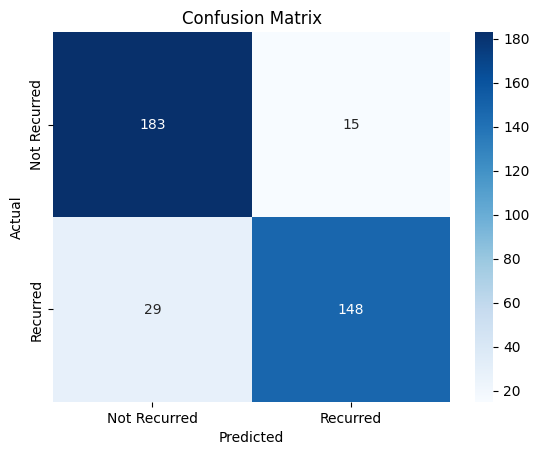

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_val_original, y_pred_original)

class_labels = ['Not Recurred', 'Recurred']
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()


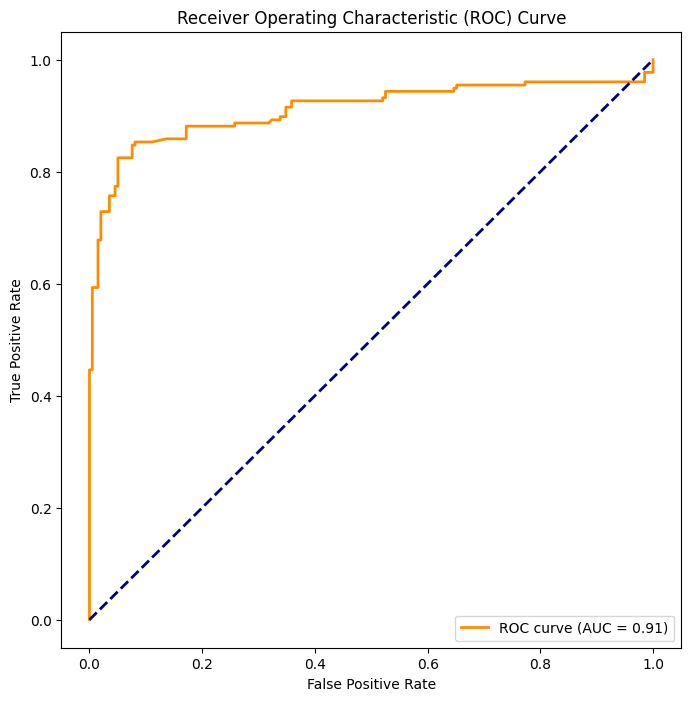

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_val_pred_proba = clf.predict_proba(X_val_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**2. XGBoost Model**

In [ ]:
y_pred = xgb.predict(X_val_scaled)

y_pred_original = label_encoder.inverse_transform(y_pred)
y_val_original = label_encoder.inverse_transform(y_val)

In [ ]:
val_accuracy = accuracy_score(y_val_original, y_pred_original)
val_report = classification_report(y_val_original, y_pred_original)

print("Testing Set Accuracy:", val_accuracy)
print("Testing Set Classification Report:\n", val_report)

Testing Set Accuracy: 0.8346666666666667
Testing Set Classification Report:
               precision    recall  f1-score   support

Not Recurred       0.87      0.81      0.84       198
    Recurred       0.80      0.86      0.83       177

    accuracy                           0.83       375
   macro avg       0.83      0.84      0.83       375
weighted avg       0.84      0.83      0.83       375



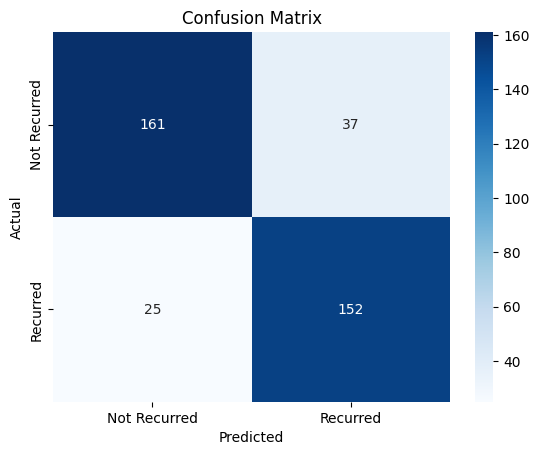

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_val_original, y_pred_original)

class_labels = ['Not Recurred', 'Recurred']
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

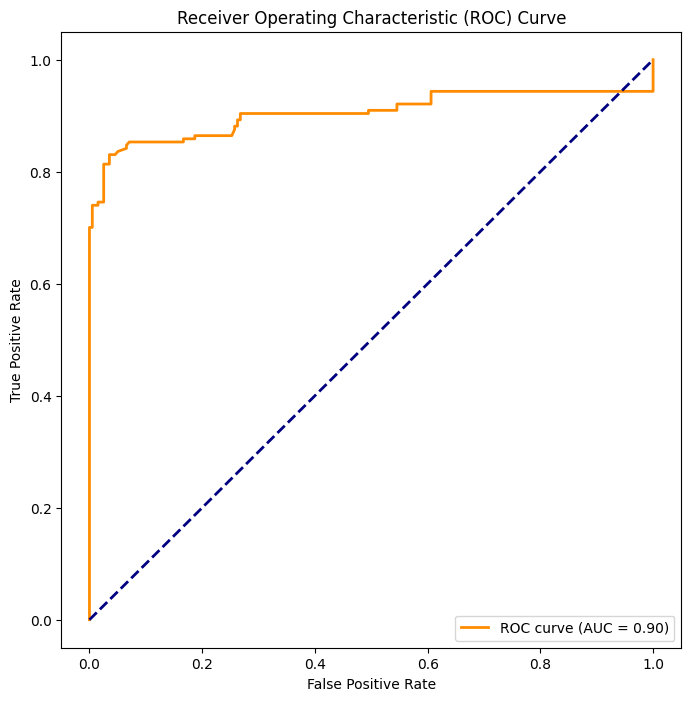

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_val_pred_proba = xgb.predict_proba(X_val_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**3. Support Vector Machine Model**

In [ ]:
y_pred = SVM.predict(X_val_scaled)

y_pred_original = label_encoder.inverse_transform(y_pred)
y_val_original = label_encoder.inverse_transform(y_val)

In [ ]:
val_accuracy = accuracy_score(y_val_original, y_pred_original)
val_report = classification_report(y_val_original, y_pred_original)

print("Testing Set Accuracy:", val_accuracy)
print("Testing Set Classification Report:\n", val_report)

Testing Set Accuracy: 0.8666666666666667
Testing Set Classification Report:
               precision    recall  f1-score   support

Not Recurred       0.82      0.95      0.88       198
    Recurred       0.94      0.77      0.84       177

    accuracy                           0.87       375
   macro avg       0.88      0.86      0.86       375
weighted avg       0.88      0.87      0.87       375



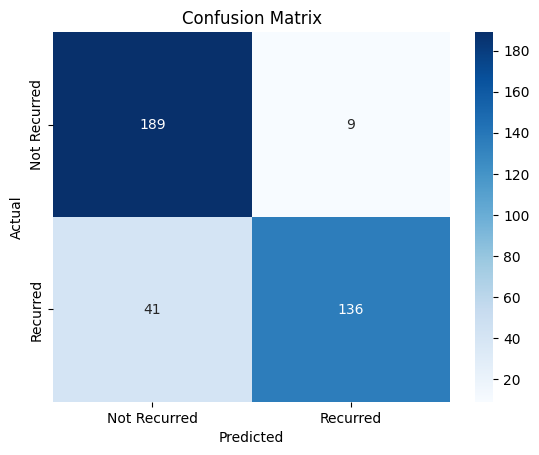

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_val_original, y_pred_original)

class_labels = ['Not Recurred', 'Recurred']
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

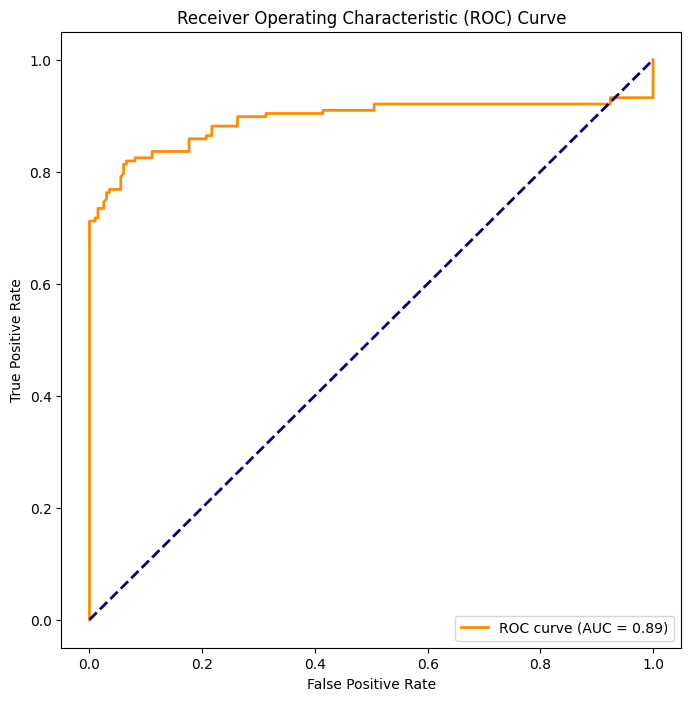

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming SVM is your SVM classifier and X_val_scaled, y_val are your validation set
y_val_pred_proba = SVM.predict_proba(X_val_scaled)[:, 1] if hasattr(SVM, 'predict_proba') else SVM.decision_function(X_val_scaled)

fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


**4. KNN Model**

In [ ]:
y_pred = knn.predict(X_val_scaled)

y_pred_original = label_encoder.inverse_transform(y_pred)
y_val_original = label_encoder.inverse_transform(y_val)

In [ ]:
val_accuracy = accuracy_score(y_val_original, y_pred_original)
val_report = classification_report(y_val_original, y_pred_original)

print("Testing Set Accuracy:", val_accuracy)
print("Testing Set Classification Report:\n", val_report)

Testing Set Accuracy: 0.8586666666666667
Testing Set Classification Report:
               precision    recall  f1-score   support

Not Recurred       0.84      0.91      0.87       198
    Recurred       0.89      0.80      0.84       177

    accuracy                           0.86       375
   macro avg       0.86      0.86      0.86       375
weighted avg       0.86      0.86      0.86       375



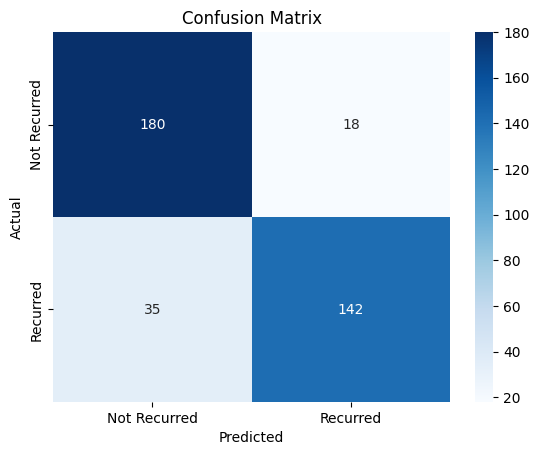

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_val_original, y_pred_original)

class_labels = ['Not Recurred', 'Recurred']
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

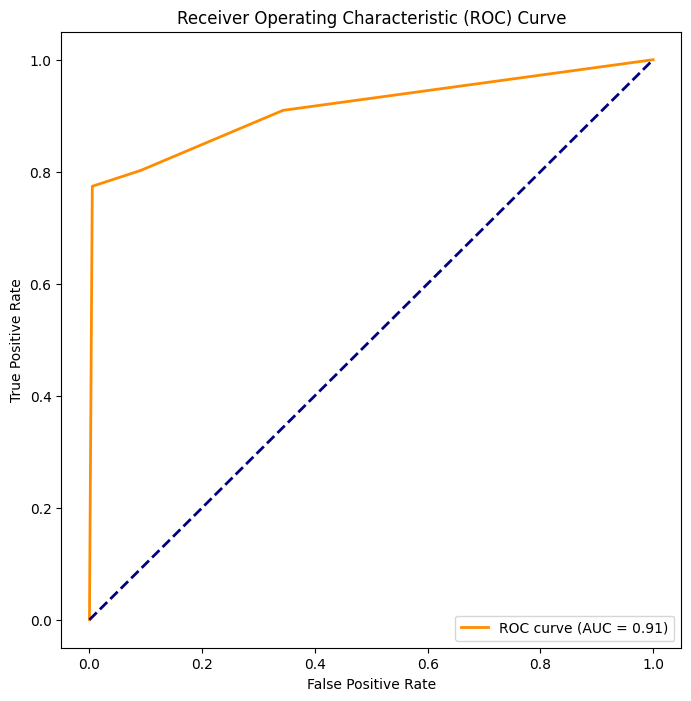

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_val_pred_proba = knn.predict_proba(X_val_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**5. NN Model**

In [ ]:
val_loss, val_accuracy = model.evaluate(X_val_scaled, y_val)
val_report = classification_report(y_val, (model.predict(X_val_scaled) > 0.5).astype(int))

print(f"Validation Loss: {val_loss:.4f}")
print("Validation Set Accuracy:", val_accuracy)
print("Validation Set Classification Report:\n", val_report)

12/12 [==============================] - 0s 3ms/step
Validation Loss: 0.2919
Validation Set Accuracy: 0.8960000276565552
Validation Set Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.91       198
           1       0.94      0.83      0.88       177

    accuracy                           0.90       375
   macro avg       0.90      0.89      0.89       375
weighted avg       0.90      0.90      0.90       375



12/12 [==============================] - 0s 6ms/step


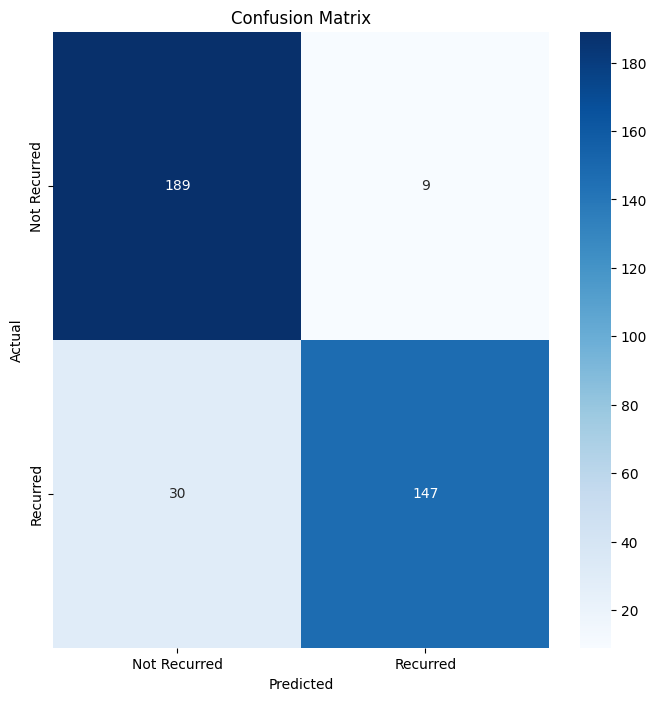

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_val_pred = (model.predict(X_val_scaled) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_val, y_val_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Recurred', 'Recurred'], yticklabels=['Not Recurred', 'Recurred'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


12/12 [==============================] - 0s 4ms/step


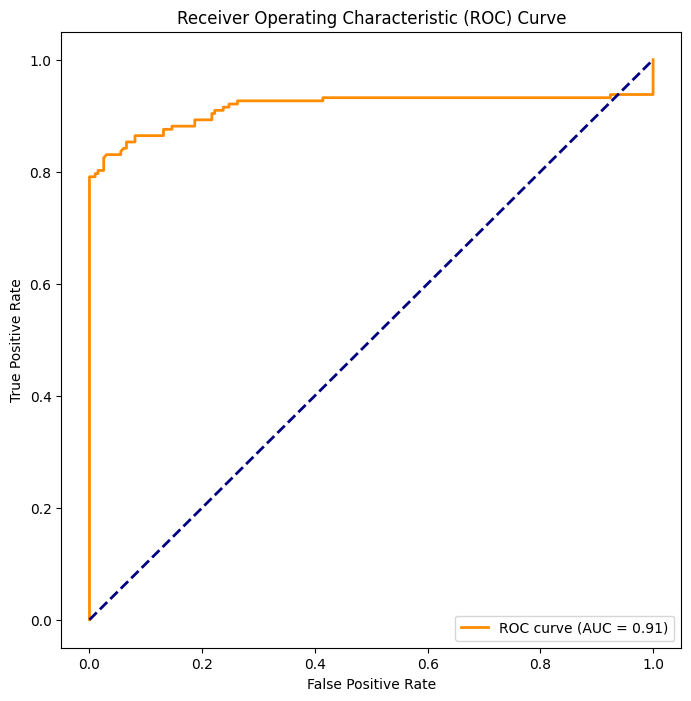

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_val_pred_proba = model.predict(X_val_scaled)[:, 0]
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
